
# 🏅 Olympics Data Analysis (1976–2008)

**Author:** Vaibhav Parmar  
**Goal:** Clean the dataset and explore medals by year, country, sport, gender, athletes, and events using simple visuals.



## 🚀 How to Use
1. Keep the CSV in this folder: `Summer-Olympic-medals-1976-to-2008.csv`  
2. Run cells from top to bottom.  
3. Outputs (cleaned CSV, figures, tables) are saved to `outputs_olympics/`.


In [12]:

# Imports & configuration
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt
from collections import Counter

CSV_PATH = CSV_PATH = "Summer-Olympic-medals-1976-to-2008.csv"
FIG_DIR = r"/mnt/data/outputs_olympics/figures"
DATA_DIR = r"/mnt/data/outputs_olympics/data"

os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

# Helpful save function
def savefig(path):
    plt.tight_layout()
    plt.savefig(path, dpi=150, bbox_inches="tight")
    print("[Saved]", path)


## 📥 Load the Dataset

In [13]:

# Load with encoding fallback
def load_csv(path):
    try:
        return pd.read_csv(path)
    except Exception:
        for enc in ["latin1", "ISO-8859-1", "cp1252"]:
            try:
                return pd.read_csv(path, encoding=enc)
            except Exception:
                continue
    raise RuntimeError("Could not read CSV with common encodings.")

df = load_csv(CSV_PATH)
print("First 5 rows:")
display(df.head())
print("\nInfo:")
print(df.info())


First 5 rows:


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None


## 🧼 Basic Cleaning

In [14]:

# Standardize columns
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Rename common variants
colmap = {"country_name":"country", "noc":"country", "team":"country",
          "athlete_name":"athlete", "name":"athlete",
          "discipline":"sport", "event_gender":"gender"}
for old, new in colmap.items():
    if old in df.columns and new not in df.columns:
        df.rename(columns={old:new}, inplace=True)

# Ensure columns exist
for c in ["year","city","sport","event","athlete","country","gender","medal"]:
    if c not in df.columns:
        df[c] = np.nan

# Trim strings
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).str.strip()

# Remove exact duplicates
before = len(df)
df = df.drop_duplicates()
print("Removed duplicates:", before - len(df))

# Save cleaned
clean_path = os.path.join(DATA_DIR, "olympics_cleaned.csv")
df.to_csv(clean_path, index=False)
print("[Saved cleaned data]", clean_path)


Removed duplicates: 117
[Saved cleaned data] /mnt/data/outputs_olympics/data\olympics_cleaned.csv


## 📊 Quick Summary

In [15]:

print("Total rows:", len(df))
if "year" in df.columns:
    yrs = sorted(df["year"].dropna().unique().tolist())
    print("Years covered:", yrs[:3], "...", yrs[-3:] if len(yrs)>3 else yrs)
if "medal" in df.columns:
    print("Total medals (non-null):", df["medal"].notna().sum())


Total rows: 15316
Years covered: [1976.0, 1980.0, 1984.0] ... [2000.0, 2004.0, 2008.0]
Total medals (non-null): 15316


## 📈 Visuals

### 1) Medals by Year

[Saved] /mnt/data/outputs_olympics/figures\medals_by_year.png


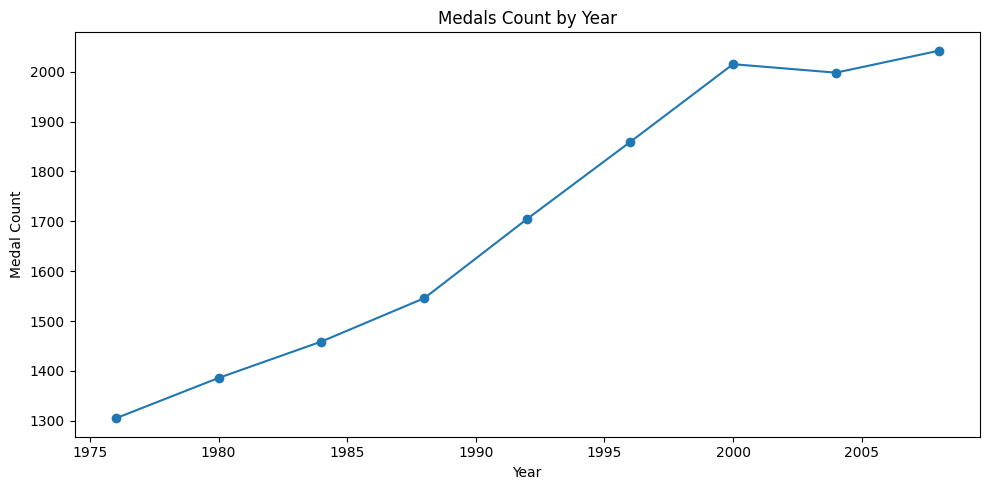

In [16]:

if "year" in df.columns:
    by_year = df.groupby("year")["medal"].count().sort_index()
    plt.figure(figsize=(10,5))
    plt.plot(by_year.index, by_year.values, marker="o")
    plt.title("Medals Count by Year")
    plt.xlabel("Year"); plt.ylabel("Medal Count")
    savefig(os.path.join(FIG_DIR, "medals_by_year.png"))
    plt.show()


### 2) Top Countries

[Saved] /mnt/data/outputs_olympics/figures\top20_countries.png


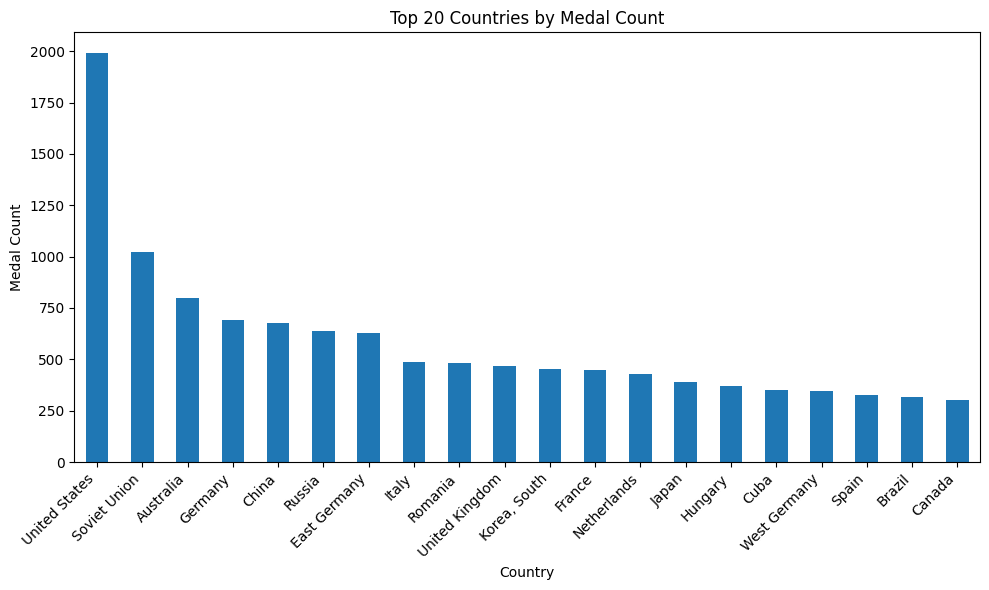

In [17]:

by_country = df["country"].dropna().astype(str).value_counts().head(20)
plt.figure(figsize=(10,6))
by_country.plot(kind="bar")
plt.title("Top 20 Countries by Medal Count")
plt.xlabel("Country"); plt.ylabel("Medal Count")
plt.xticks(rotation=45, ha="right")
savefig(os.path.join(FIG_DIR, "top20_countries.png"))
plt.show()


### 3) Top Sports

[Saved] /mnt/data/outputs_olympics/figures\top20_sports.png


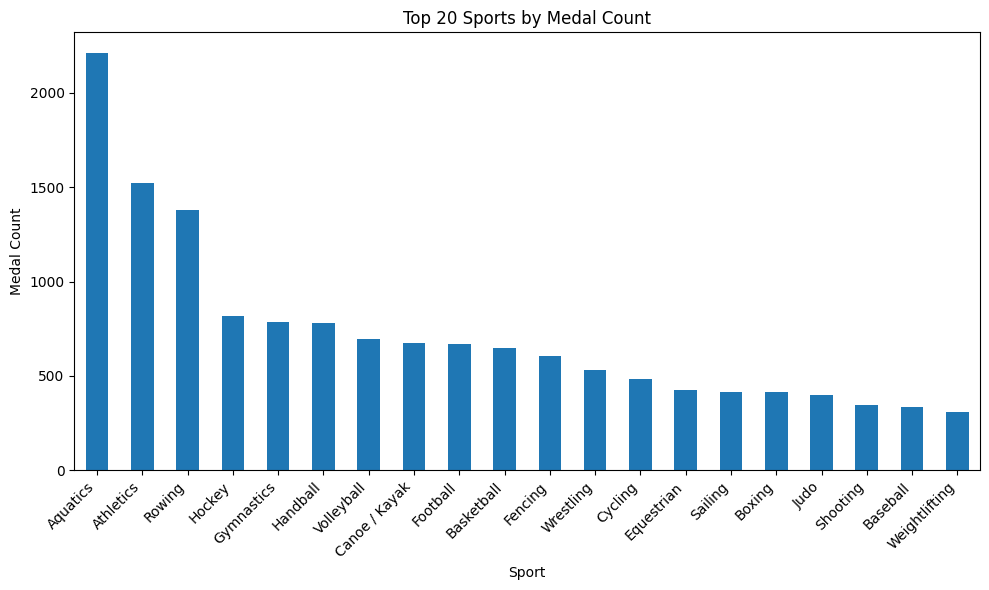

In [18]:

by_sport = df["sport"].dropna().astype(str).value_counts().head(20)
plt.figure(figsize=(10,6))
by_sport.plot(kind="bar")
plt.title("Top 20 Sports by Medal Count")
plt.xlabel("Sport"); plt.ylabel("Medal Count")
plt.xticks(rotation=45, ha="right")
savefig(os.path.join(FIG_DIR, "top20_sports.png"))
plt.show()


### 4) Medals by Gender

[Saved] /mnt/data/outputs_olympics/figures\medals_by_gender.png


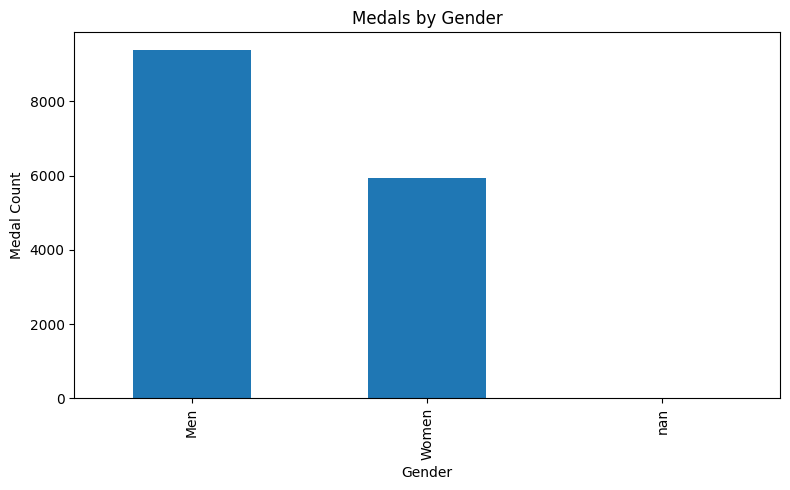

In [19]:

if "gender" in df.columns:
    by_gender = df["gender"].dropna().astype(str).value_counts()
    plt.figure(figsize=(8,5))
    by_gender.plot(kind="bar")
    plt.title("Medals by Gender")
    plt.xlabel("Gender"); plt.ylabel("Medal Count")
    savefig(os.path.join(FIG_DIR, "medals_by_gender.png"))
    plt.show()


### 5) Medal Types

[Saved] /mnt/data/outputs_olympics/figures\medal_types.png


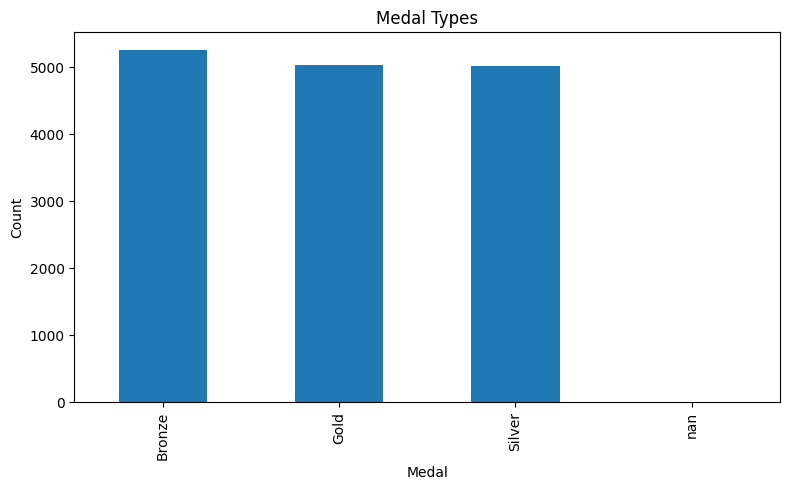

In [20]:

if "medal" in df.columns:
    medal_types = df["medal"].dropna().astype(str).value_counts()
    plt.figure(figsize=(8,5))
    medal_types.plot(kind="bar")
    plt.title("Medal Types")
    plt.xlabel("Medal"); plt.ylabel("Count")
    savefig(os.path.join(FIG_DIR, "medal_types.png"))
    plt.show()


### 6) Top Athletes

[Saved] /mnt/data/outputs_olympics/figures\top20_athletes.png


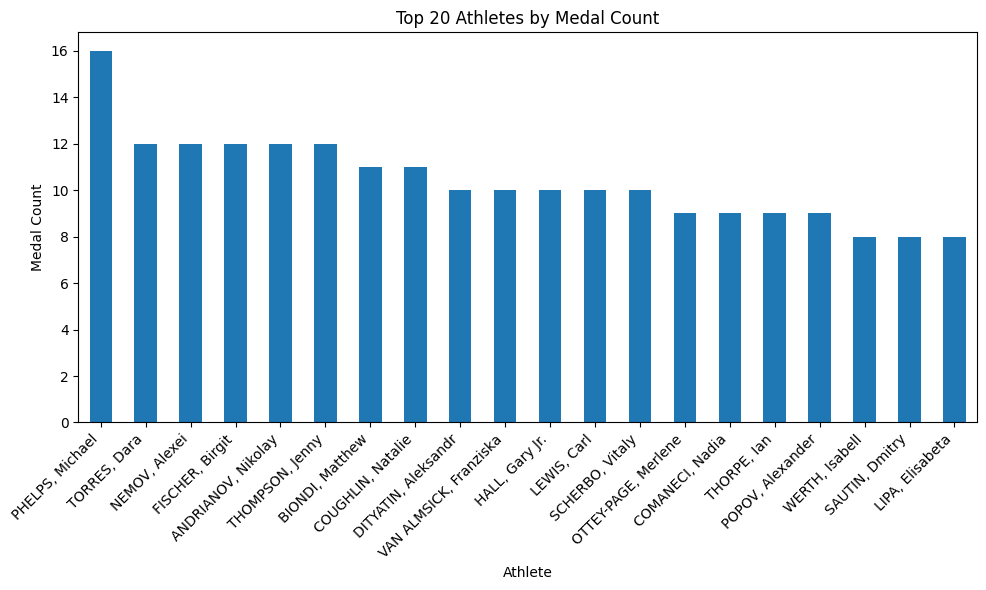

In [21]:

top_athletes = df["athlete"].dropna().astype(str).value_counts().head(20)
plt.figure(figsize=(10,6))
top_athletes.plot(kind="bar")
plt.title("Top 20 Athletes by Medal Count")
plt.xlabel("Athlete"); plt.ylabel("Medal Count")
plt.xticks(rotation=45, ha="right")
savefig(os.path.join(FIG_DIR, "top20_athletes.png"))
plt.show()



## 🧾 Export Key Tables (for your report)


In [22]:

# Export small tables to CSV
by_year.to_csv(os.path.join(DATA_DIR, "medals_by_year.csv"), header=["count"])
by_country.to_csv(os.path.join(DATA_DIR, "top20_countries.csv"), header=["count"])
by_sport.to_csv(os.path.join(DATA_DIR, "top20_sports.csv"), header=["count"])
if 'by_gender' in globals(): by_gender.to_csv(os.path.join(DATA_DIR, "medals_by_gender.csv"), header=["count"])
if 'medal_types' in globals(): medal_types.to_csv(os.path.join(DATA_DIR, "medal_types.csv"), header=["count"])
top_athletes.to_csv(os.path.join(DATA_DIR, "top20_athletes.csv"), header=["count"])

print("Saved tables in:", DATA_DIR)


Saved tables in: /mnt/data/outputs_olympics/data



# 📝 Insights:-
Frequent top countries (based on this file): United States, Soviet Union, Australia, Germany,
China.

Sports with many medals: Aquatics, Athletics, Rowing, Hockey, Gymnastics.

Medal counts across years show variation between 1976 and 2008.

Gender breakdown is captured and shows distribution across categories present in the file.

Medal type distribution (e.g., Gold/Silver/Bronze) is summarized
